In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [24]:
df.shape

(200, 6)

In [6]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


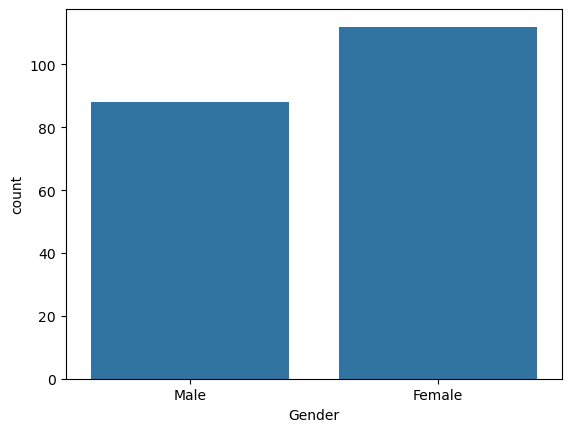

In [7]:
# Gender distribution
sns.countplot(x="Gender", data=df)
plt.show()

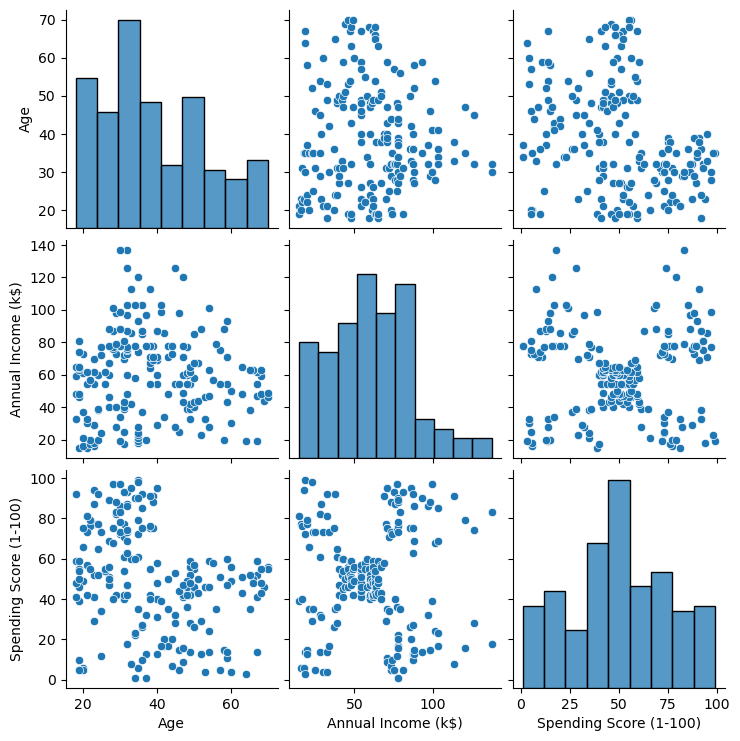

In [7]:
# Pairplot for visualization
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()

In [9]:
#  Step 4: Feature Selection
# ----------------------------
# We will use Age, Annual Income, Spending Score
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [12]:
# Normalize/Scale data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

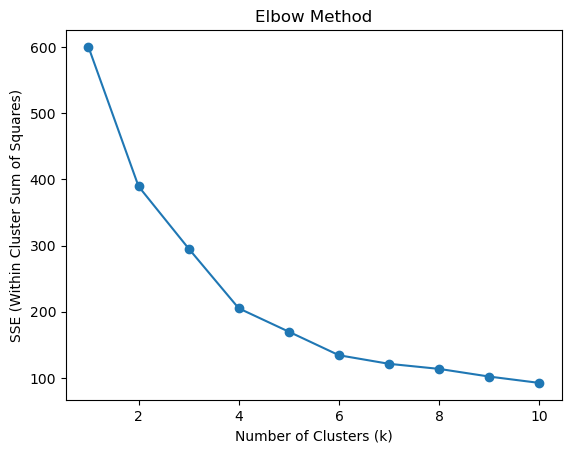

In [13]:
#Step 5: Find Optimal K
# ----------------------------
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_X)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Within Cluster Sum of Squares)")
plt.title("Elbow Method")
plt.show()

In [14]:
# Silhouette Score
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(scaled_X)
    print(f"k={k}, silhouette_score={silhouette_score(scaled_X, preds)}")

k=2, silhouette_score=0.33547192894004574
k=3, silhouette_score=0.3579234303882264
k=4, silhouette_score=0.4039582785148566
k=5, silhouette_score=0.40846873777345605
k=6, silhouette_score=0.43106526216603014


C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
#  Step 6: Apply K-Means

# Suppose optimal k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_X)


df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])


# View cluster distribution
print(df["Cluster"].value_counts())

Cluster
0    101
1     39
3     38
2     22
Name: count, dtype: int64


C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\trish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
df.to_csv("customer_clusters.csv", index=False)


In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


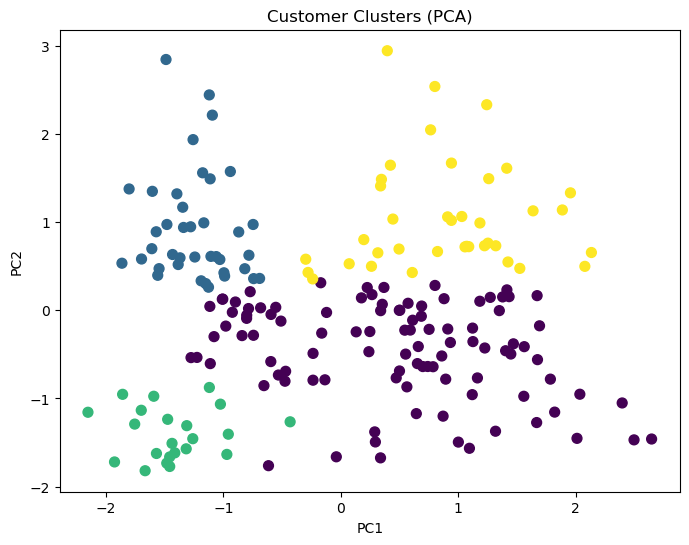

In [34]:
#  Step 7: Visualize Clusters
# ----------------------------
# PCA for 2D Visualization
pca = PCA(2)
data_2d = pca.fit_transform(scaled_X)

plt.figure(figsize=(8,6))
plt.scatter(data_2d[:,0], data_2d[:,1], c=df["Cluster"], cmap="viridis", s=50)
plt.title("Customer Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [35]:
#Step 8: Profile Clusters

numeric_df=df.select_dtypes(include=['int64','float64'])
cluster_profile = numeric_df.groupby(df["Cluster"]).mean()
print(cluster_profile)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         70.475248  43.603960           48.168317               43.396040
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        162.000000  40.394737           87.000000               18.631579


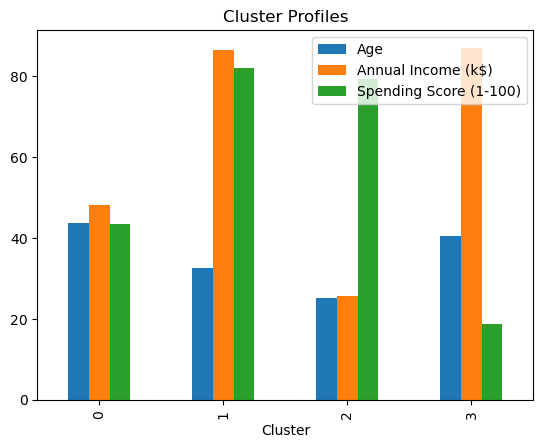

In [36]:
# Visualize profiles
cluster_profile[["Age","Annual Income (k$)","Spending Score (1-100)"]].plot(kind="bar")
plt.title("Cluster Profiles")
plt.show()